In [1]:
%load_ext dotenv
%reload_ext dotenv
%dotenv

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import sys
from os.path import dirname

UTILS_PATH=os.environ.get('REPO') + "/notebooks/commons"
sys.path.append(dirname(UTILS_PATH))

from commons import check_args, gen_paths, coordinates_bounds

In [4]:
def compare_box_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax)

    ax = fig.add_subplot(2,1,2)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)
    
def compare_box_vs_violin_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)

    ax = fig.add_subplot(2,1,2)
    sns.violinplot(data=df, x=x, y=y, ax=ax)
    
def compare_box_dist(df, label):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(3,1,1)
    sns.distplot(df[label])

    ax = fig.add_subplot(3,1,2)
    sns.boxplot(df[label], ax=ax)
    
    ax = fig.add_subplot(3,1,3)
    sns.boxplot(df[label], ax=ax, showfliers=False)

In [5]:
def get_normalized_price_by_max(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(lambda e: e.max())
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "max_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)
    
    df_estratos = pd.merge(df_prices, df)
    df_estratos.loc[:, "norm_price_by_max"] = \
        df_estratos.apply(lambda e: e[price]/e["max_price"], axis=1)
    return df_estratos

In [6]:
def upper_interquartile_distance(df):
    q1 = np.quantile(df, .25)
    q3 = np.quantile(df, .75)
    return q3 + 1.5*(q3 - q1)

def get_normalized_price_by_tipical(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(upper_interquartile_distance)
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "normal_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)

    df_estratos = pd.merge(df_prices, df)
    
    df_estratos = df_estratos.loc[df_estratos[price] <= df_estratos["normal_price"]]
    df_estratos.loc[:, "norm_price_by_stat"] = \
        df_estratos.apply(lambda e: e[price]/e["normal_price"], axis=1)

    return df_estratos

In [7]:
def plot_price_vs_discrete_value(df, label, showfliers=True):
    plt.figure(figsize=(16,10))
    features = ['rooms','baths','garages', "antiguedad"]
    for i,f in enumerate(features):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=f ,y=label, data=df, showfliers=showfliers)
        plt.title(f'{f}')

In [8]:
def load_posts(input_path):
    df = pd.read_parquet(input_path)
    return df

In [9]:
if __name__ == "__main__":
    city = "manizales"
    property_type = "apartamentos"
    post_type = "arriendo"
    
    #city, property_type, post_type = check_args()
    base_path = os.environ.get('REPO')
    
    raw_path, clean_path = gen_paths(city, property_type, post_type)
    
    raw_path = base_path + raw_path
    clean_path = base_path + clean_path

In [10]:
MSG = """
Hay {} publicaciones de {} en total
"""

posts = load_posts(clean_path)
print(MSG.format(posts.shape[0], post_type))
posts.head()


Hay 1027 publicaciones de arriendo en total



,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,estrato,antiguedad,fid,city,property_type,post_type,price_m2
0,65.0,2.0,1.0,0.0,0.65,5.058869,Arrienda apartamento en el barrio La Sultana s...,-75.475807,Manizales La Sultana,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,4.0,desconocido,5469476,manizales,apartamentos,arriendo,0.010000
1,55.0,2.0,1.0,0.0,0.80,5.058840,Apartamento con excelente iluminación muy bien...,-75.485168,Manizales La Rambla,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,5.0,1 a 8,5357660,manizales,apartamentos,arriendo,0.014545
2,80.0,2.0,2.0,1.0,1.90,5.052409,Administra Bienes Raíces ofrece para arrendami...,-75.485085,Manizales Camelia,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,6.0,1 a 8,5670358,manizales,apartamentos,arriendo,0.023750
4,100.0,4.0,2.0,0.0,1.25,5.053482,Espacioso apartamento en un tercer piso con gr...,-75.495567,Manizales Fátima,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,3.0,1 a 8,5468657,manizales,apartamentos,arriendo,0.012500
5,41.0,3.0,1.0,0.0,0.50,5.070275,"Area de 41 mtrs, excelente ubicacion, muy ilum...",-75.513817,Manizales SANTOS,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,3.0,16 a 30,5174681,manizales,apartamentos,arriendo,0.012195


### Distribución variables continuas

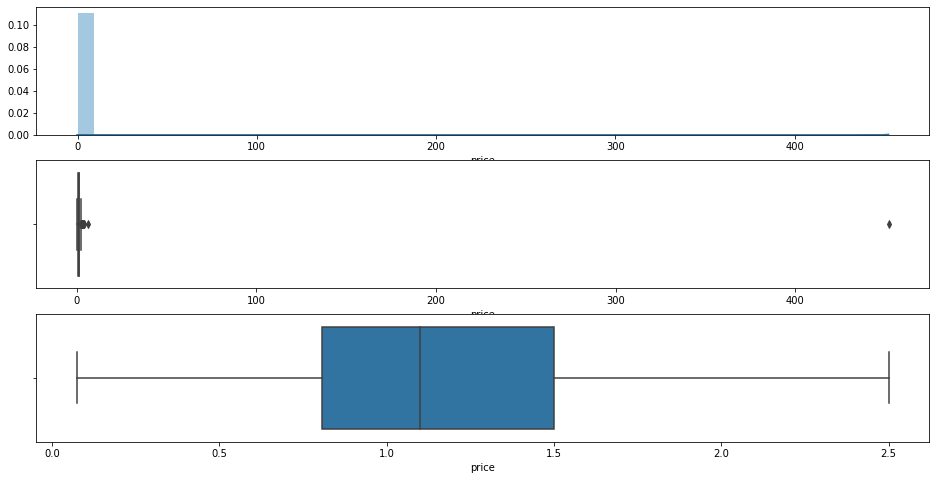

In [11]:
compare_box_dist(posts, "price")

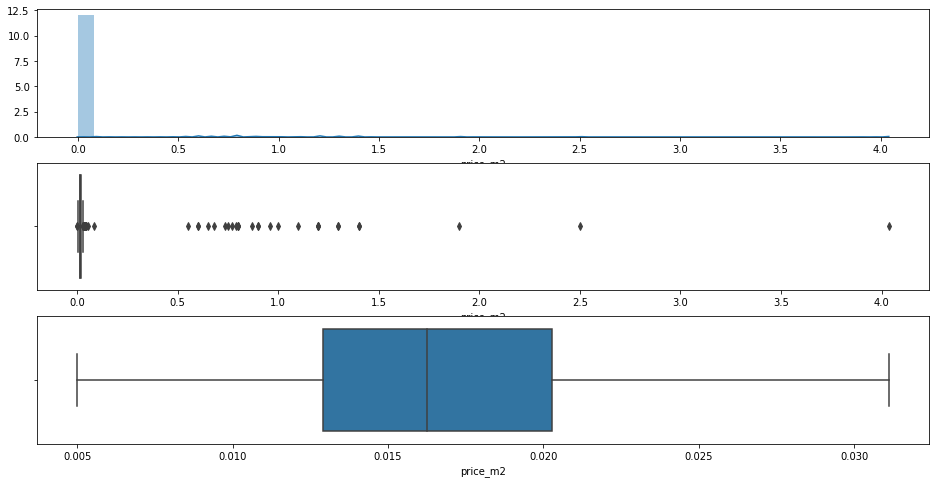

In [12]:
compare_box_dist(posts, "price_m2")

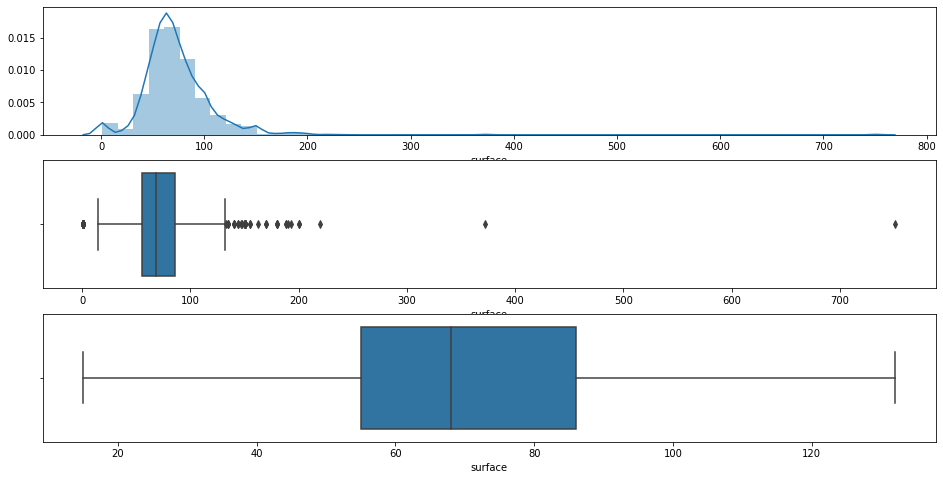

In [13]:
compare_box_dist(posts, "surface")

### Distribución precio por varibles discreta

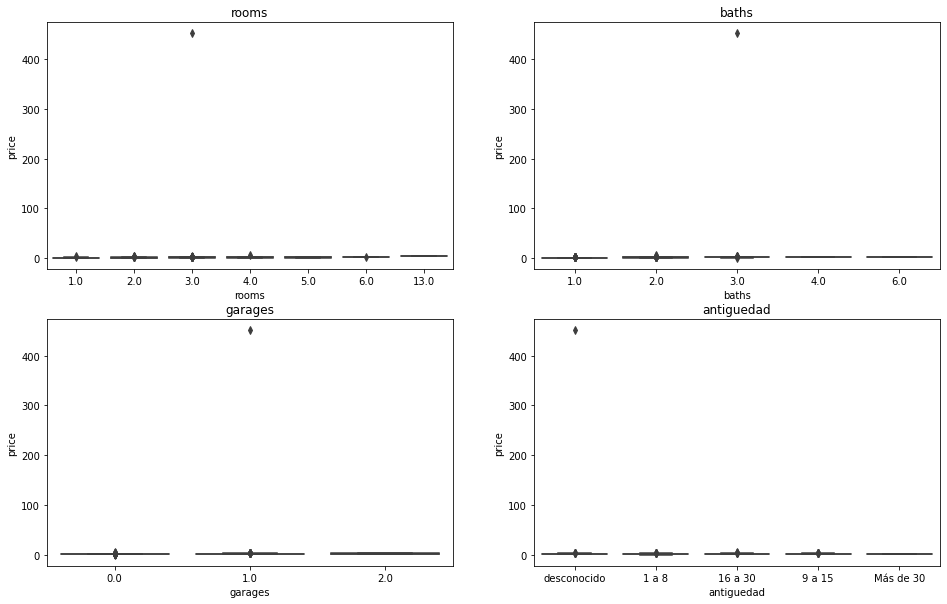

In [14]:
plot_price_vs_discrete_value(posts, "price")

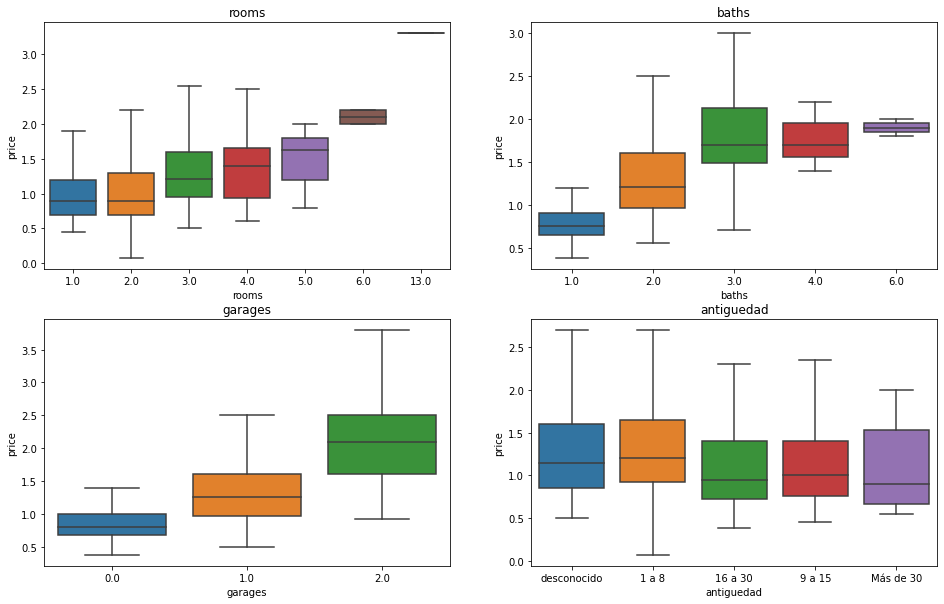

In [15]:
plot_price_vs_discrete_value(posts, "price", showfliers=False)

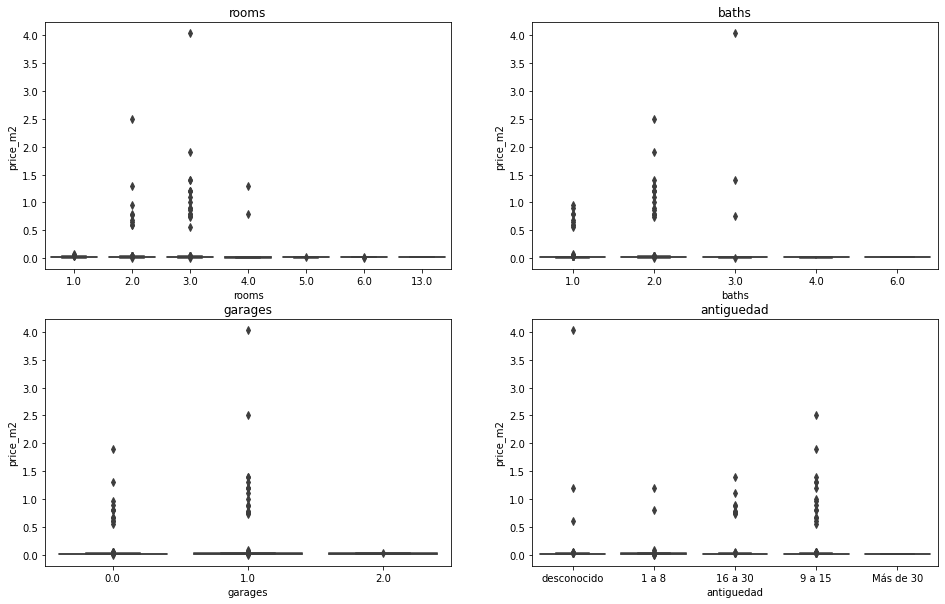

In [16]:
plot_price_vs_discrete_value(posts, "price_m2")

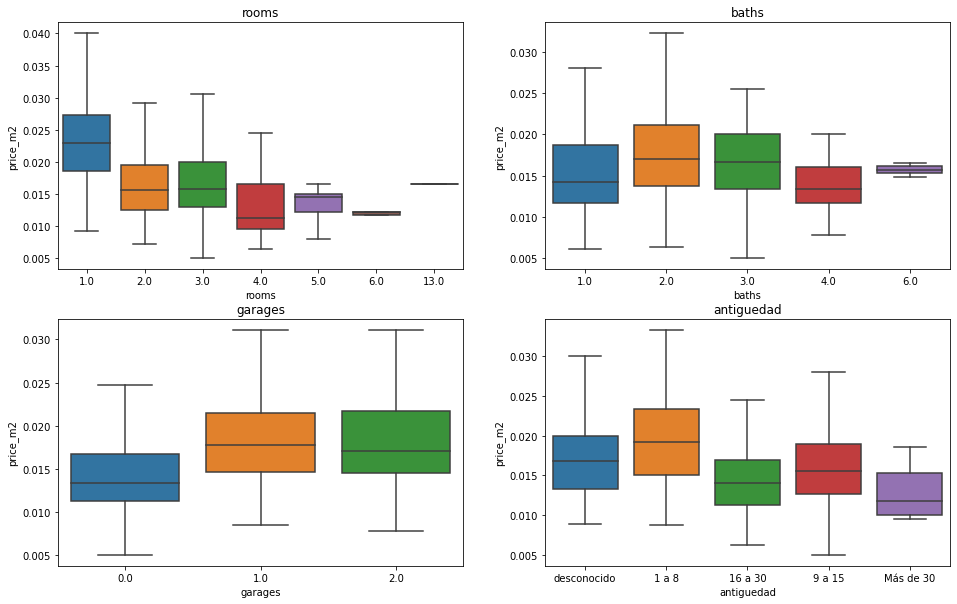

In [17]:
plot_price_vs_discrete_value(posts, "price_m2", showfliers=False)

,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2
estrato,,,,,,,,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3.0,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
4.0,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
5.0,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
6.0,387,387,387,387,387,387,387,387,387,387,387,387,387,387,387,387,387


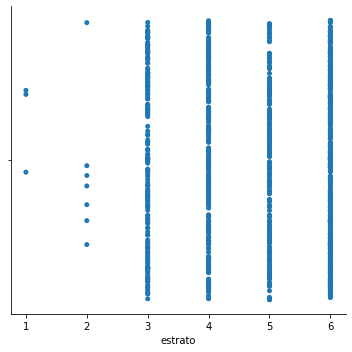

In [18]:
## Numero de muestras por estrato

sns.catplot(data=posts, x="estrato")
posts.groupby("estrato").count()

### Distribución del precio discriminado por estrato

Se verifica la forma del histograma de las variables continuas clasificadas por estrato

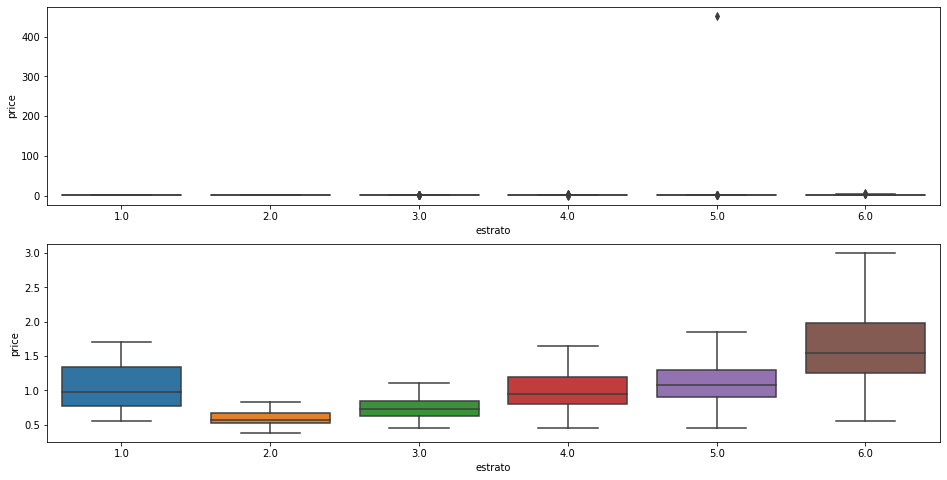

In [19]:
compare_box_plot(posts, "estrato", "price")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [20]:
normalized_price = get_normalized_price_by_max(posts)
normalized_price.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,1.70,81.0,3.0,2.0,1.0,1.70,5.041699,Apartamento de 3 habitaciones alcoba principal...,-75.478821,Manizales milan,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,1 a 8,3865751,manizales,apartamentos,arriendo,0.020988,1.000000
1,1.0,1.70,58.0,2.0,1.0,0.0,0.98,5.059853,Se Alquila Apartamento muy bei ubicado amplio ...,-75.487831,Manizales Avenida santander,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5713498,manizales,apartamentos,arriendo,0.016897,0.576471
2,1.0,1.70,48.0,2.0,1.0,0.0,0.55,5.082634,Apartamento con espacios amplios espacios el c...,-75.513878,Manizales puerta del sol,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,desconocido,5574513,manizales,apartamentos,arriendo,0.011458,0.323529
3,2.0,0.83,40.0,2.0,1.0,0.0,0.38,5.065320,Inmobiliaria Giraldo Castaño ofrece apartament...,-75.518188,Manizales san joaquin,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,16 a 30,5466593,manizales,apartamentos,arriendo,0.009500,0.457831
4,2.0,0.83,55.0,3.0,1.0,0.0,0.57,5.055540,APARTAMENTO PARA EL ARRENDAMIENTO EN EL GUAMAL...,-75.509148,Manizales guamal,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5666107,manizales,apartamentos,arriendo,0.010364,0.686747


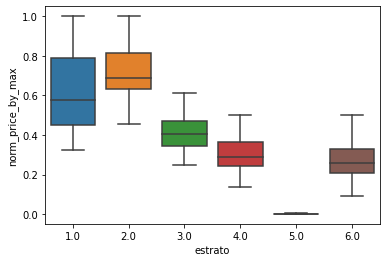

In [21]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [22]:
normalized_price = get_normalized_price_by_tipical(posts)
normalized_price.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,2.2025,81.0,3.0,2.0,1.0,1.70,5.041699,Apartamento de 3 habitaciones alcoba principal...,-75.478821,Manizales milan,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,1 a 8,3865751,manizales,apartamentos,arriendo,0.020988,0.771850
1,1.0,2.2025,58.0,2.0,1.0,0.0,0.98,5.059853,Se Alquila Apartamento muy bei ubicado amplio ...,-75.487831,Manizales Avenida santander,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5713498,manizales,apartamentos,arriendo,0.016897,0.444949
2,1.0,2.2025,48.0,2.0,1.0,0.0,0.55,5.082634,Apartamento con espacios amplios espacios el c...,-75.513878,Manizales puerta del sol,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,desconocido,5574513,manizales,apartamentos,arriendo,0.011458,0.249716
3,2.0,0.9000,40.0,2.0,1.0,0.0,0.38,5.065320,Inmobiliaria Giraldo Castaño ofrece apartament...,-75.518188,Manizales san joaquin,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,16 a 30,5466593,manizales,apartamentos,arriendo,0.009500,0.422222
4,2.0,0.9000,55.0,3.0,1.0,0.0,0.57,5.055540,APARTAMENTO PARA EL ARRENDAMIENTO EN EL GUAMAL...,-75.509148,Manizales guamal,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5666107,manizales,apartamentos,arriendo,0.010364,0.633333


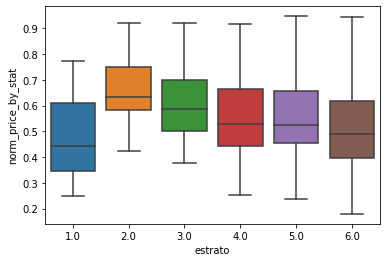

In [23]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_stat", showfliers=False)

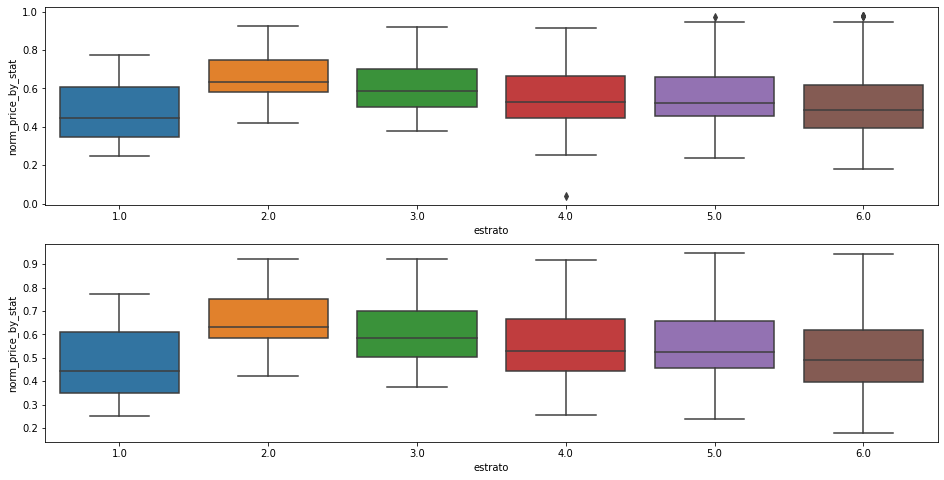

In [24]:
compare_box_plot(normalized_price, "estrato", "norm_price_by_stat")

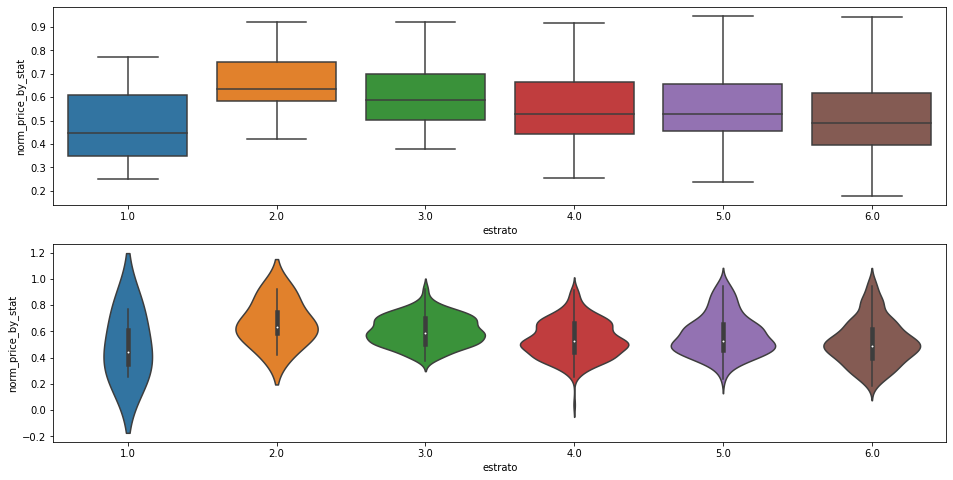

In [25]:
compare_box_vs_violin_plot(normalized_price, "estrato", "norm_price_by_stat")

### Distribución del precio del metro cuadrado discriminado por estrato

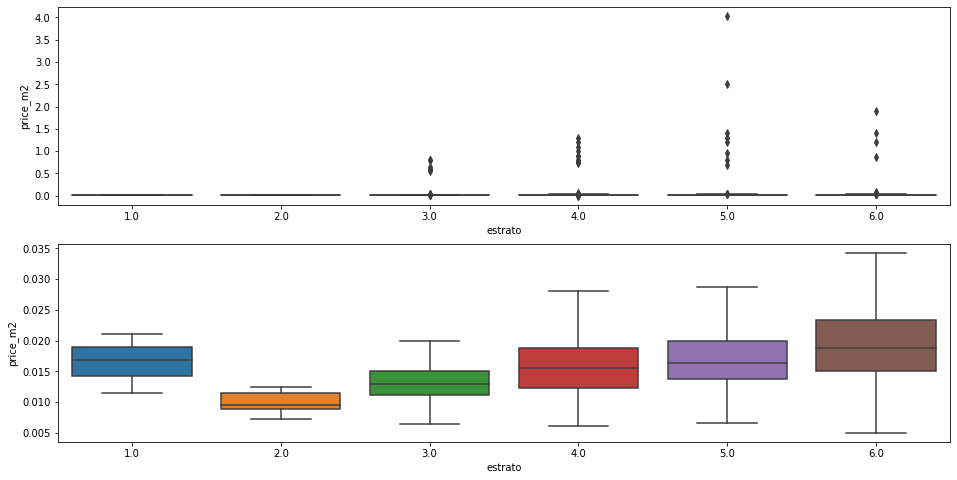

In [26]:
compare_box_plot(posts, "estrato", "price_m2")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [27]:
normalized_price_m2 = get_normalized_price_by_max(posts, price="price_m2")
normalized_price_m2.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,0.020988,81.0,3.0,2.0,1.0,1.70,5.041699,Apartamento de 3 habitaciones alcoba principal...,-75.478821,Manizales milan,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,1 a 8,3865751,manizales,apartamentos,arriendo,0.020988,1.000000
1,1.0,0.020988,58.0,2.0,1.0,0.0,0.98,5.059853,Se Alquila Apartamento muy bei ubicado amplio ...,-75.487831,Manizales Avenida santander,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5713498,manizales,apartamentos,arriendo,0.016897,0.805071
2,1.0,0.020988,48.0,2.0,1.0,0.0,0.55,5.082634,Apartamento con espacios amplios espacios el c...,-75.513878,Manizales puerta del sol,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,desconocido,5574513,manizales,apartamentos,arriendo,0.011458,0.545956
3,2.0,0.012500,40.0,2.0,1.0,0.0,0.38,5.065320,Inmobiliaria Giraldo Castaño ofrece apartament...,-75.518188,Manizales san joaquin,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,16 a 30,5466593,manizales,apartamentos,arriendo,0.009500,0.760000
4,2.0,0.012500,55.0,3.0,1.0,0.0,0.57,5.055540,APARTAMENTO PARA EL ARRENDAMIENTO EN EL GUAMAL...,-75.509148,Manizales guamal,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5666107,manizales,apartamentos,arriendo,0.010364,0.829091


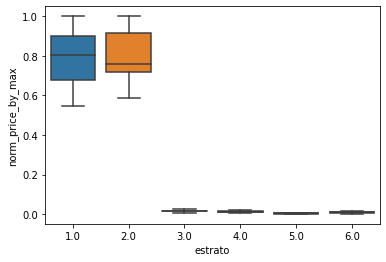

In [28]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [29]:
normalized_price_m2 = get_normalized_price_by_tipical(posts, price="price_m2")
normalized_price_m2.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,0.026089,81.0,3.0,2.0,1.0,1.70,5.041699,Apartamento de 3 habitaciones alcoba principal...,-75.478821,Manizales milan,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,1 a 8,3865751,manizales,apartamentos,arriendo,0.020988,0.804461
1,1.0,0.026089,58.0,2.0,1.0,0.0,0.98,5.059853,Se Alquila Apartamento muy bei ubicado amplio ...,-75.487831,Manizales Avenida santander,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5713498,manizales,apartamentos,arriendo,0.016897,0.647648
2,1.0,0.026089,48.0,2.0,1.0,0.0,0.55,5.082634,Apartamento con espacios amplios espacios el c...,-75.513878,Manizales puerta del sol,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,desconocido,5574513,manizales,apartamentos,arriendo,0.011458,0.439200
3,2.0,0.015152,40.0,2.0,1.0,0.0,0.38,5.065320,Inmobiliaria Giraldo Castaño ofrece apartament...,-75.518188,Manizales san joaquin,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,16 a 30,5466593,manizales,apartamentos,arriendo,0.009500,0.626984
4,2.0,0.015152,55.0,3.0,1.0,0.0,0.57,5.055540,APARTAMENTO PARA EL ARRENDAMIENTO EN EL GUAMAL...,-75.509148,Manizales guamal,https://www.fincaraiz.com.co/apartamento-en-ar...,0.0,9 a 15,5666107,manizales,apartamentos,arriendo,0.010364,0.683982


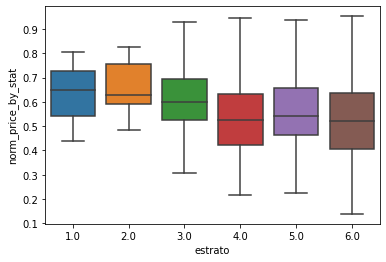

In [30]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_stat", showfliers=False)

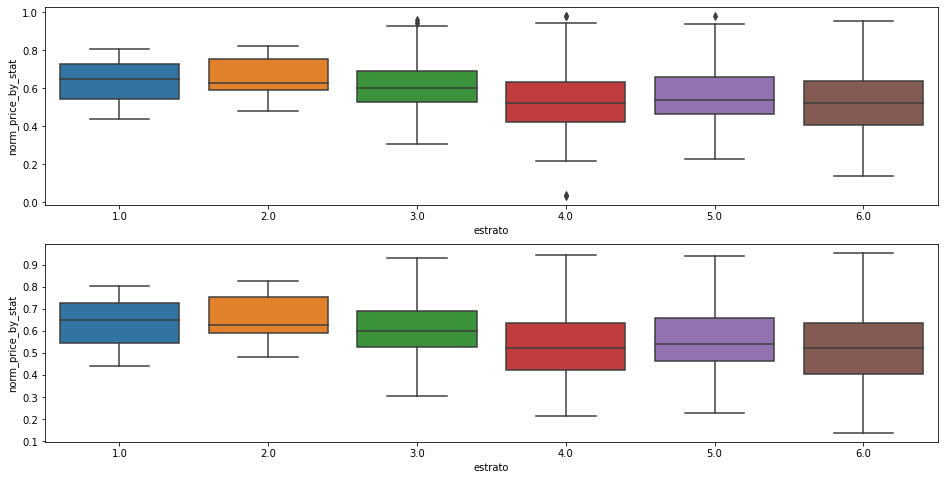

In [31]:
compare_box_plot(normalized_price_m2, "estrato", "norm_price_by_stat")

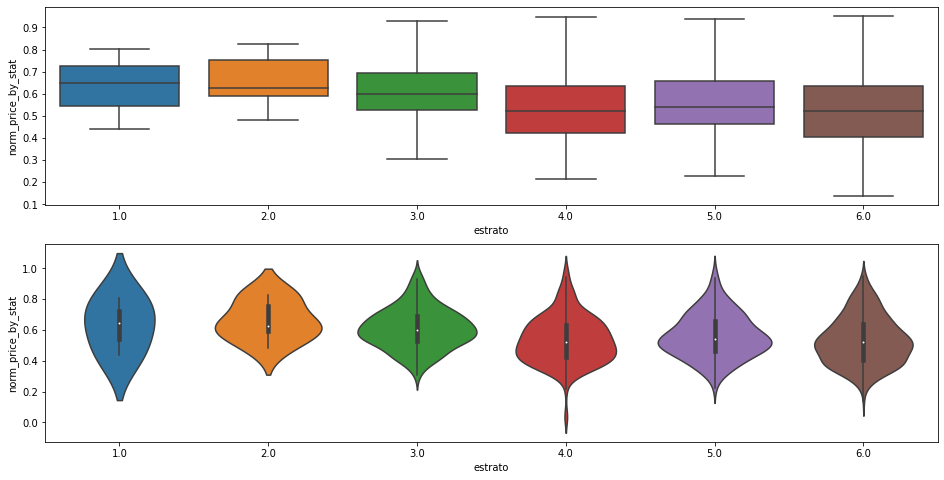

In [32]:
compare_box_vs_violin_plot(normalized_price_m2, "estrato", "norm_price_by_stat")